<a href="https://colab.research.google.com/github/hasinibolloji/YouTube-Video-Virality-Predictor/blob/main/youtube_video_virality_BA_minor_cbp_5%2C8%2C49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload dataset if not present
try:
    with open('/content/INvideos.csv', 'r') as f:
        pass
except FileNotFoundError:
    print("Uploading INvideos.csv...")
    uploaded = files.upload()

# Load dataset
df = pd.read_csv('/content/INvideos.csv', on_bad_lines='skip', engine='python')


# Quick view
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


/tmp/ipython-input-2830123800.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')


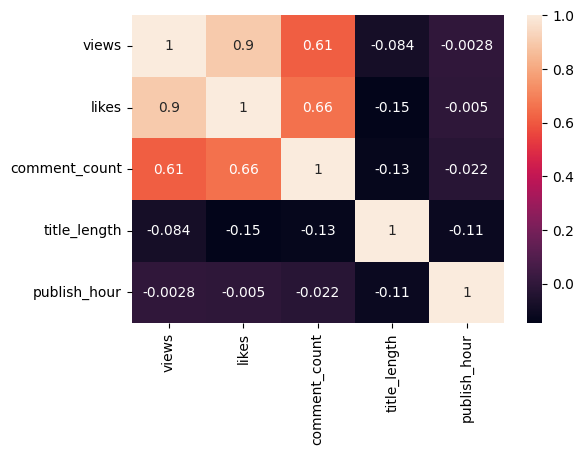

In [5]:
# Basic cleaning
df.dropna(inplace=True)

# Convert dates
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Feature engineering
df['publish_hour'] = df['publish_time'].dt.hour
df['title_length'] = df['title'].apply(len)

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['views','likes','comment_count','title_length','publish_hour']].corr(), annot=True)
plt.show()

R² score: 0.9463434247129817


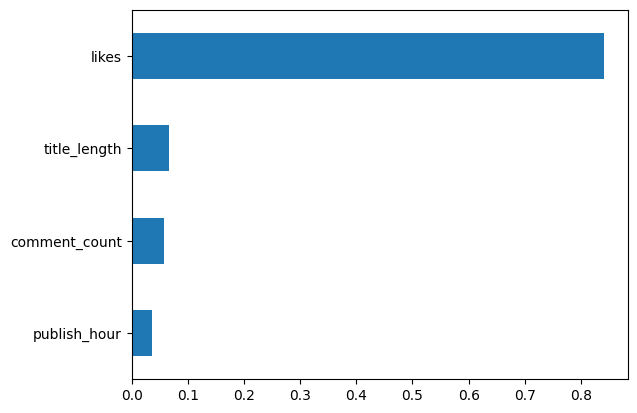

In [6]:
# Selecting features
X = df[['title_length', 'publish_hour', 'likes', 'comment_count']]
y = df['views']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Prediction accuracy
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))

# Feature importance
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.show()


In [7]:
print("\n===== DATA-DRIVEN INSIGHTS =====\n")

# 1. Analyze ideal title length
df['title_length_bucket'] = pd.cut(df['title_length'], bins=[0,20,40,60,80,100,200],
                                   labels=['0–20','20–40','40–60','60–80','80–100','100+'])

title_stats = df.groupby('title_length_bucket')['views'].mean()

print("📌 Average views for each title length range:")
print(title_stats)
best_range = title_stats.idxmax()
print(f"\n👉 Best-performing title length range: **{best_range} characters**")

# 2. Analyze best publish hour
hour_stats = df.groupby('publish_hour')['views'].mean()

best_hour = hour_stats.idxmax()
print(f"\n⏰ Best hour to publish (highest average views): **{best_hour}:00**")

# 3. Correlation-based advice
corr_likes = df['likes'].corr(df['views'])
corr_comments = df['comment_count'].corr(df['views'])

print("\n📈 Correlation Strengths:")
print(f"Likes → Views: {corr_likes:.3f}")
print(f"Comments → Views: {corr_comments:.3f}")

# 4. Final practical advice
print("\n===== ACTIONABLE ADVICE =====\n")

# Title advice
print(f"• Ideal title length: **{best_range} characters**")
if '40–60' in str(best_range):
    print("  ✓ This is the sweet spot. Not too long, not too short.")
elif '0–20' in str(best_range):
    print("  ✓ Short punchy titles work best in your dataset.")
elif '80–100' in str(best_range) or '100+' in str(best_range):
    print("  ✓ Long descriptive titles perform best for this dataset.")

# Publish time advice
print(f"\n• Best time to publish: **{best_hour}:00**")
if 17 <= best_hour <= 22:
    print("  ✓ Evening uploads perform best for your audience.")
elif 8 <= best_hour <= 12:
    print("  ✓ Morning uploads get the most attention.")
else:
    print("  ✓ Your audience is active at unusual hours — experiment more.")

# Engagement advice
print("\n• Engagement is the #1 factor:")
if corr_likes > corr_comments:
    print("  ✓ Likes influence views slightly more than comments.")
else:
    print("  ✓ Comments influence views slightly more than likes.")

print("\n===== END =====")



===== DATA-DRIVEN INSIGHTS =====

📌 Average views for each title length range:
title_length_bucket
0–20      4.934118e+05
20–40     1.353875e+06
40–60     8.243742e+05
60–80     6.119893e+05
80–100    5.848487e+05
100+               NaN
Name: views, dtype: float64

👉 Best-performing title length range: **20–40 characters**

⏰ Best hour to publish (highest average views): **21:00**

📈 Correlation Strengths:
Likes → Views: 0.897
Comments → Views: 0.612

===== ACTIONABLE ADVICE =====

• Ideal title length: **20–40 characters**

• Best time to publish: **21:00**
  ✓ Evening uploads perform best for your audience.

• Engagement is the #1 factor:
  ✓ Likes influence views slightly more than comments.

===== END =====


/tmp/ipython-input-155877913.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  title_stats = df.groupby('title_length_bucket')['views'].mean()
